In [3]:
# importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [4]:
# reading the dataset
loans_data = pd.read_csv("E:\DATASCIENCE ASSIGNMENT\loans_data.csv")


In [5]:
# Calculate the mean for each column
mean_values = loans_data.mean(numeric_only=True)

# Print the mean values
print("Mean values for each column:")
# printing mean values
print(mean_values)

Mean values for each column:
credit.policy            0.804970
int.rate                 0.122640
installment            319.089413
log.annual.inc          10.932117
dti                     12.606679
fico                   710.846314
days.with.cr.line     4560.767197
revolving bal        16913.963876
revovingl util          46.799236
inq.last.6mths           1.577469
delinquency.2yrs         0.163708
pub.rec                  0.062122
not.fully.paid           0.160054
dtype: float64


In [6]:
# Calculate the standard deviation for each column
std_values = loans_data.std(numeric_only=True)

# Print the standard deviation values
print("Standard deviation values for each column:")
# printing std values
print(std_values)

Standard deviation values for each column:
credit.policy            0.396245
int.rate                 0.026847
installment            207.071301
log.annual.inc           0.614813
dti                      6.883970
fico                    37.970537
days.with.cr.line     2496.930377
revolving bal        33756.189557
revovingl util          29.014417
inq.last.6mths           2.200245
delinquency.2yrs         0.546215
pub.rec                  0.262126
not.fully.paid           0.366676
dtype: float64


In [7]:
# Generating descriptive statistics using describe function
loans_data.describe()
# Printing loans_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revolving bal,revovingl util,inq.last.6mths,delinquency.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [20]:
# Display the first few rows of the dataset
print(loans_data.head())

# Check for missing values
print(loans_data.isnull().sum())


   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revolving bal  revovingl util  \
0  19.48   737        5639.958333          28854            52.1   
1  14.29   707        2760.000000          33623            76.7   
2  11.63   682        4710.000000           3511            25.6   
3   8.10   712        2699.958333          33667            73.2   
4  14.97   667        4066.000000           4740            39.5   

   inq.last.6mths  delinquency.2yrs  pub.rec  not.fully.paid  Cluster  
0               0                 0        0

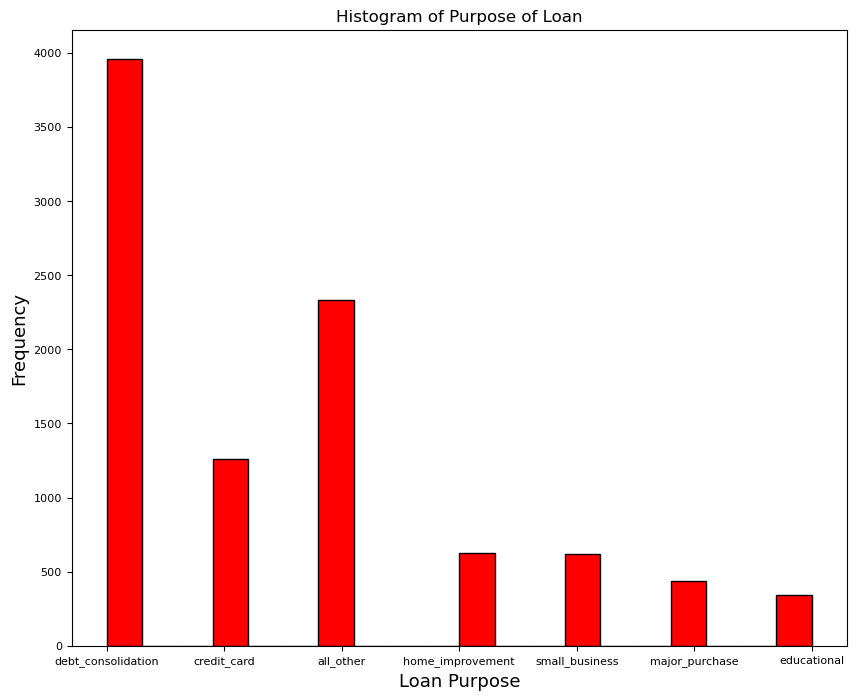

In [19]:
def plot_loan_purpose_histogram(loans_data):
    """
    Generates a histogram of the purpose of loans.

    Args:
    loans_data (DataFrame): DataFrame containing the data with a column 'purpose'.

    Returns:
    None
    """

# Histogram of loans  data
plt.figure(figsize=(10, 8))
plt.hist(loans_data['purpose'], bins=20, color='red', edgecolor='black')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Adding labels and title
plt.xlabel('Loan Purpose', fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.title('Histogram of Purpose of Loan')

# Display the plot
plt.show()


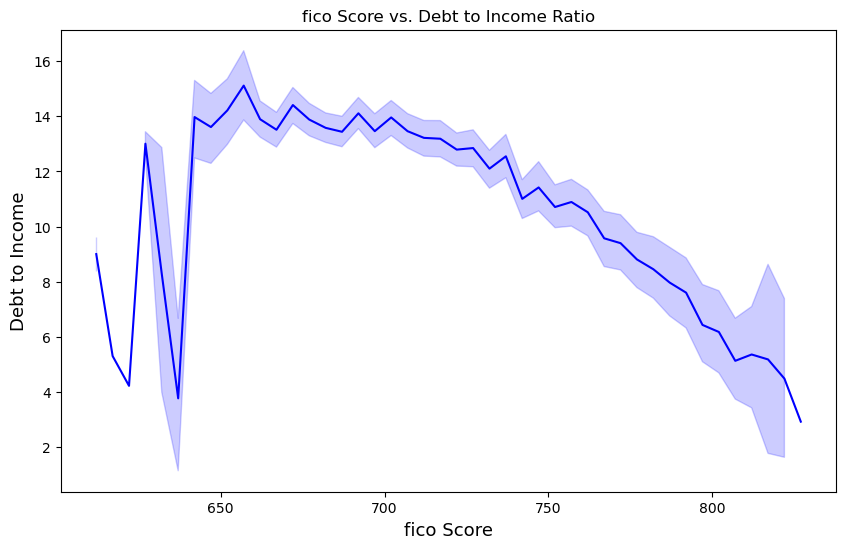

In [17]:
def plot_fico_vs_dti(loans_data):
    """
    Generates a line graph of FICO score versus Debt to Income (DTI) ratio.

    Args:
    loans_data (DataFrame): DataFrame containing the data with columns 'fico' and 'dti'.

    Returns:
    None
    """
# Line graph of fico Score vs. Debt to Income Ratio
plt.figure(figsize=(10, 6))
sns.lineplot(x='fico', y='dti', data=loans_data, color='blue')
plt.title('fico Score vs. Debt to Income Ratio')
plt.xlabel('fico Score', fontsize= 13)
plt.ylabel('Debt to Income', fontsize=13)
plt.show()

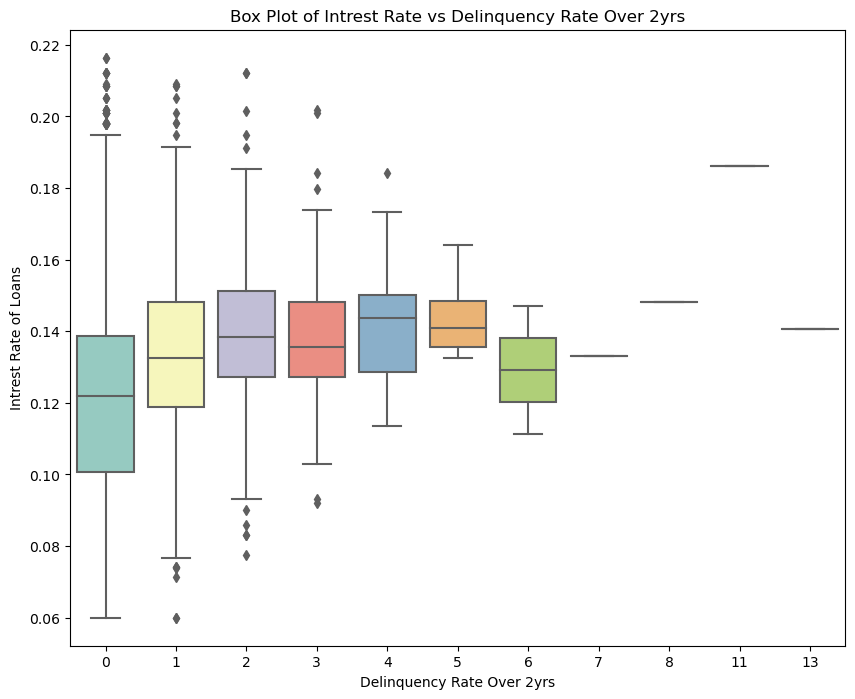

In [15]:
def plot_interest_vs_delinquency(loans_data):
    """
    Generates a box plot of interest rate versus delinquency rate over a two-year period.

    Args:
    loans_data (DataFrame): DataFrame containing the data with columns 'delinquency.2yrs' and 'int.rate'.

    Returns:
    None
    """
# Box plot of Box Plot of Intrest Rate vs Delinquency Rate Over 2yrs
plt.figure(figsize=(10, 8))
sns.boxplot(x='delinquency.2yrs', y='int.rate', data=loans_data, palette='Set3')
plt.title('Box Plot of Intrest Rate vs Delinquency Rate Over 2yrs')
plt.xlabel('Delinquency Rate Over 2yrs')
plt.ylabel('Intrest Rate of Loans')
plt.show()

C:\Users\annam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\annam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

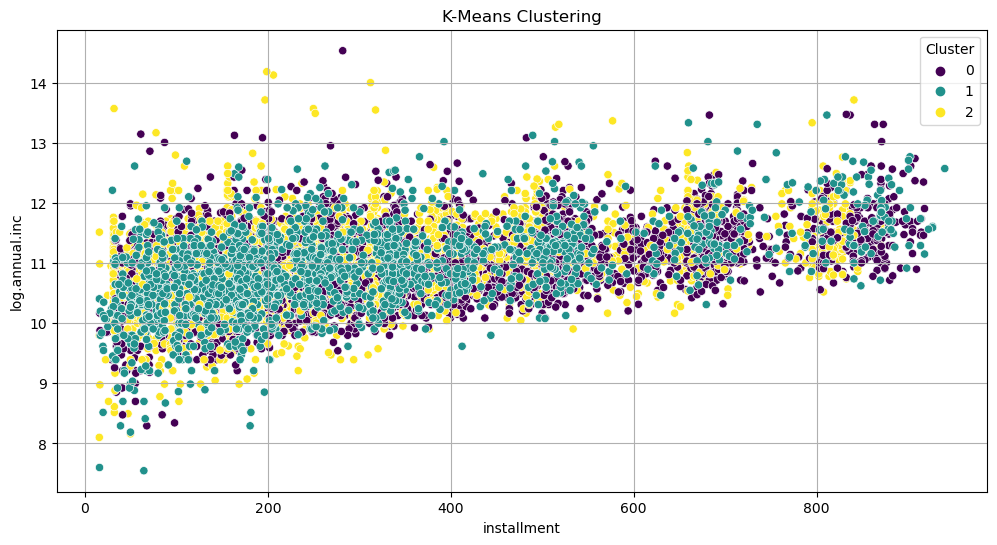

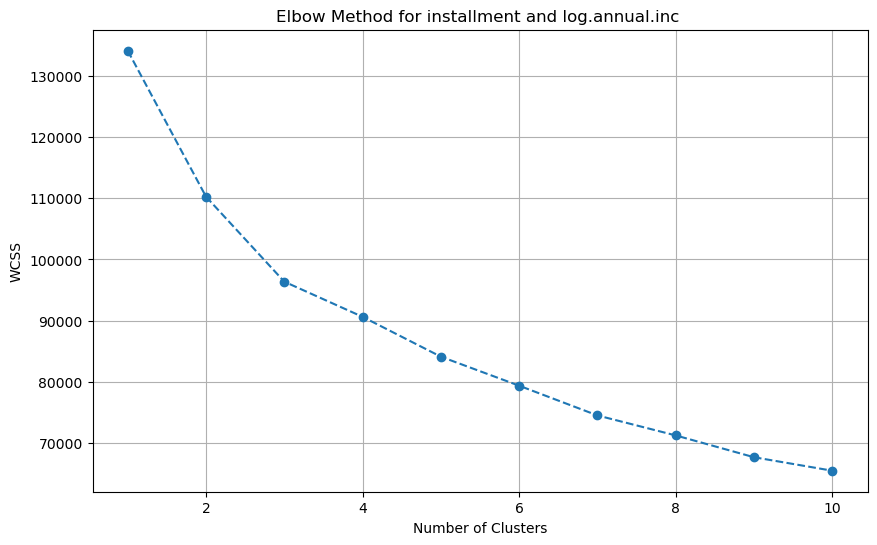

In [29]:
# Separate features and target variable
X = loans_data.drop('purpose', axis=1)
y = loans_data['purpose']

# Data Preprocessing: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)



# Fit k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataset
loans_data['Cluster'] = kmeans.labels_

# Visualize clustering results (scatter plot)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='installment', y='log.annual.inc', hue='Cluster', data=loans_data, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('installment')
plt.ylabel('log.annual.inc')
plt.grid(True)
plt.show()

# Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for installment and log.annual.inc ')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


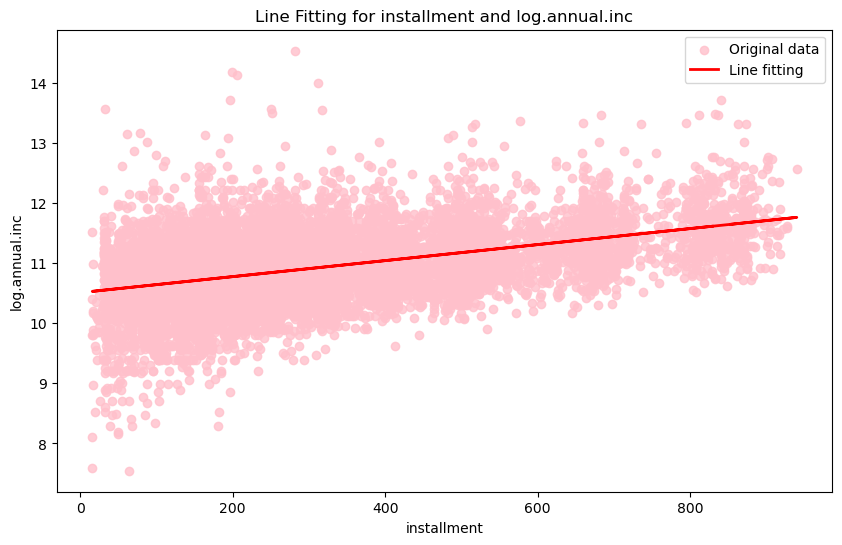

In [53]:
# Drop rows with NaN values in 'installment' and 'log.annual.inc'
loans_data.dropna(subset=['installment', 'log.annual.inc'], inplace=True)

# Selecting the features for line fitting
X = loans_data['installment'].values.reshape(-1, 1)  # Reshape to a 2D array
y = loans_data['log.annual.inc']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plotting the line fitting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='pink', alpha=0.8, label='Original data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Line fitting')
plt.title('Line Fitting for installment and log.annual.inc')
plt.xlabel('installment')
plt.ylabel('log.annual.inc')
plt.legend()
plt.show()

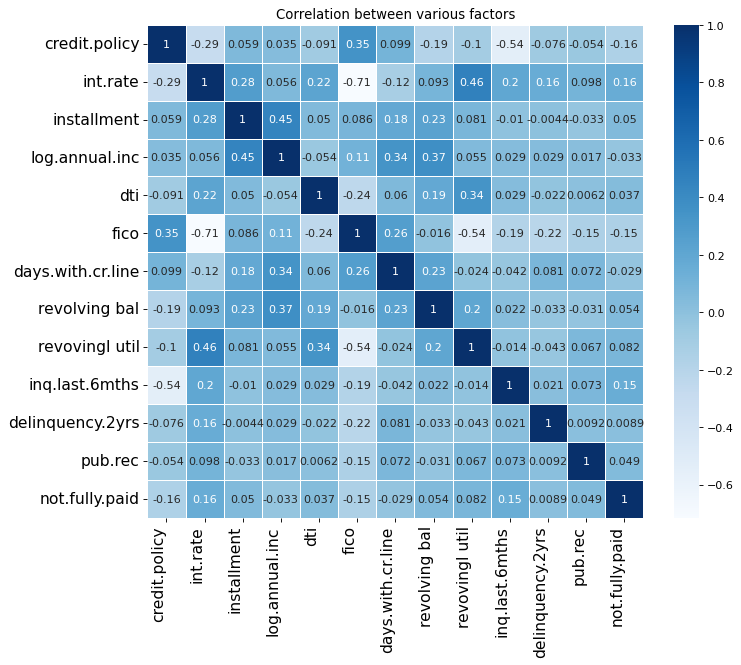

In [32]:
# Select the desired columns
selected_columns =['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revolving bal', 'revovingl util', 'inq.last.6mths', 'delinquency.2yrs',  'pub.rec',  'not.fully.paid']
# Create DataFrame df_new with selected columns
loans_new = loans_data[selected_columns]
def plot_heatmap(df_new):
    """
    Create a heatmap to observe the correlation between attributes.

    Parameters:
    - data (DataFrame): Input DataFrame containing the data.

    Returns:
    - None
    """
    plt.figure(figsize=(10, 8), dpi=80)
    # Calculate correlation matrix for numeric columns only
    corr_matrix = loans_new.select_dtypes(include='number').corr()
    # Plotting a heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=.5)
    plt.title('Correlation between various factors')
    # Rotate x-axis labels if needed
    plt.xticks(rotation=90, ha='right', fontsize=14)
    # Rotate y-axis labels if needed
    plt.yticks(rotation=360, fontsize=14)
    # Save and display the plot
    plt.savefig('Heatmap.png')
    plt.show()

# Assuming 'loans data' is your DataFrame
plot_heatmap(loans_new)

In [47]:
# Calculate the skewness for each column
skewness_values = loans_data.skew(numeric_only=True)

# Print the skewness values
print("Skewness values for each column:")
print(skewness_values)
     

Skewness values for each column:
credit.policy        -1.539621
int.rate              0.164420
installment           0.912522
log.annual.inc        0.028668
dti                   0.023941
fico                  0.471260
days.with.cr.line     1.155748
revolving bal        11.161058
revovingl util        0.059985
inq.last.6mths        3.584151
delinquency.2yrs      6.061793
pub.rec               5.126434
not.fully.paid        1.854592
dtype: float64


In [48]:
# Calculate the kurtosis for each column
kurtosis_values = loans_data.kurtosis(numeric_only=True)

# Print the kurtosis values
print("Kurtosis values for each column:")
print(kurtosis_values)
     

Kurtosis values for each column:
credit.policy          0.370512
int.rate              -0.224324
installment            0.137908
log.annual.inc         1.609004
dti                   -0.900355
fico                  -0.422312
days.with.cr.line      1.937861
revolving bal        259.655203
revovingl util        -1.116467
inq.last.6mths        26.288131
delinquency.2yrs      71.433182
pub.rec               38.781007
not.fully.paid         1.439811
dtype: float64
